In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import itertools

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [13]:
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

almost_black = '#262626'

In [8]:
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

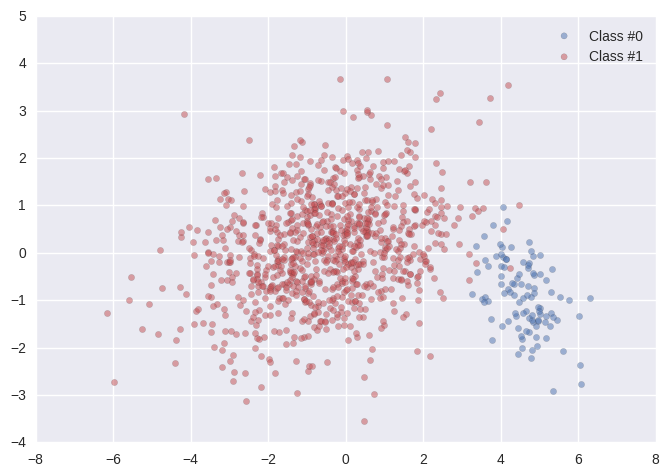

In [15]:
# Generate some data
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(x)

# Plot the original data
# Plot the two classes
palette = sns.color_palette()
plt.scatter(x_vis[y == 0, 0], x_vis[y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y == 1, 0], x_vis[y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

In [20]:
UnderSample = RandomUnderSampler()
usx, usy = UnderSample.fit_sample(x, y)
usx.shape

(200, 20)

In [22]:
usx_vis = pca.transform(usx)

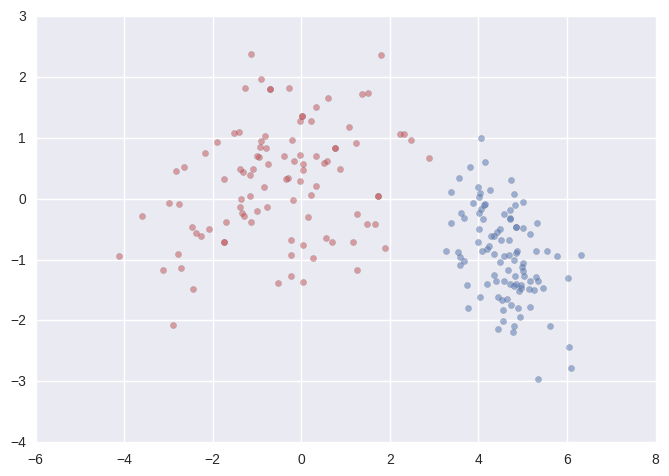

In [25]:
# Random under-sampling
plt.scatter(usx_vis[usy == 0, 0], usx_vis[usy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(usx_vis[usy == 1, 0], usx_vis[usy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

In [27]:
ratio = 'auto'

# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio)
osx, osy = OS.fit_sample(x, y)
# 'SMOTE'
smote = SMOTE(ratio=ratio, kind='regular')
smox, smoy = smote.fit_sample(x, y)

In [29]:
osx.shape, smox.shape

((1800, 20), (1800, 20))

In [31]:
osx_vis = pca.transform(osx)
smox_vis = pca.transform(smox)

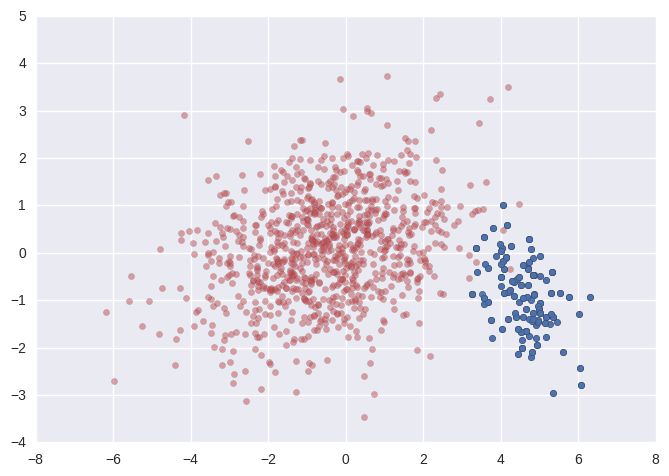

In [33]:
# Random over-sampling
plt.scatter(osx_vis[osy == 0, 0], osx_vis[osy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(osx_vis[osy == 1, 0], osx_vis[osy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

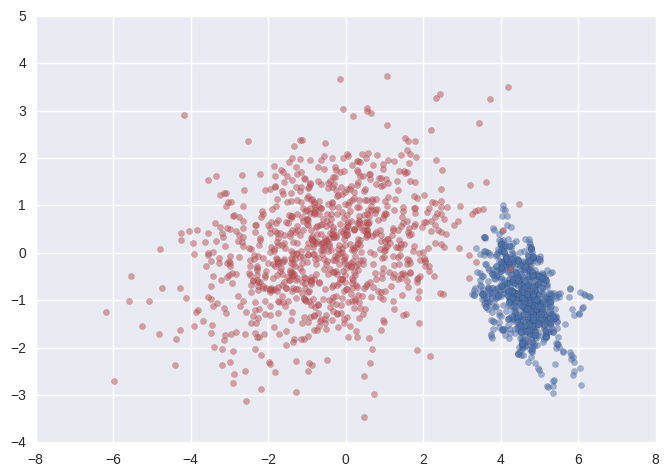

In [35]:
# SMOTE
plt.scatter(smox_vis[smoy == 0, 0], smox_vis[smoy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(smox_vis[smoy == 1, 0], smox_vis[smoy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

In [39]:
smox_vis[smoy == 0].shape , smox_vis[smoy == 1].shape

((900, 2), (900, 2))

In [43]:
x_vis[y == 0].shape , x_vis[y == 1].shape

((100, 2), (900, 2))